# Préparation et modèlisation des données

In [1]:
# Importation des package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Lecture du fichier 
df = pd.read_csv("fromage.txt", sep = '\t', index_col = 0)

# Affichage 5 première ligne
df.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


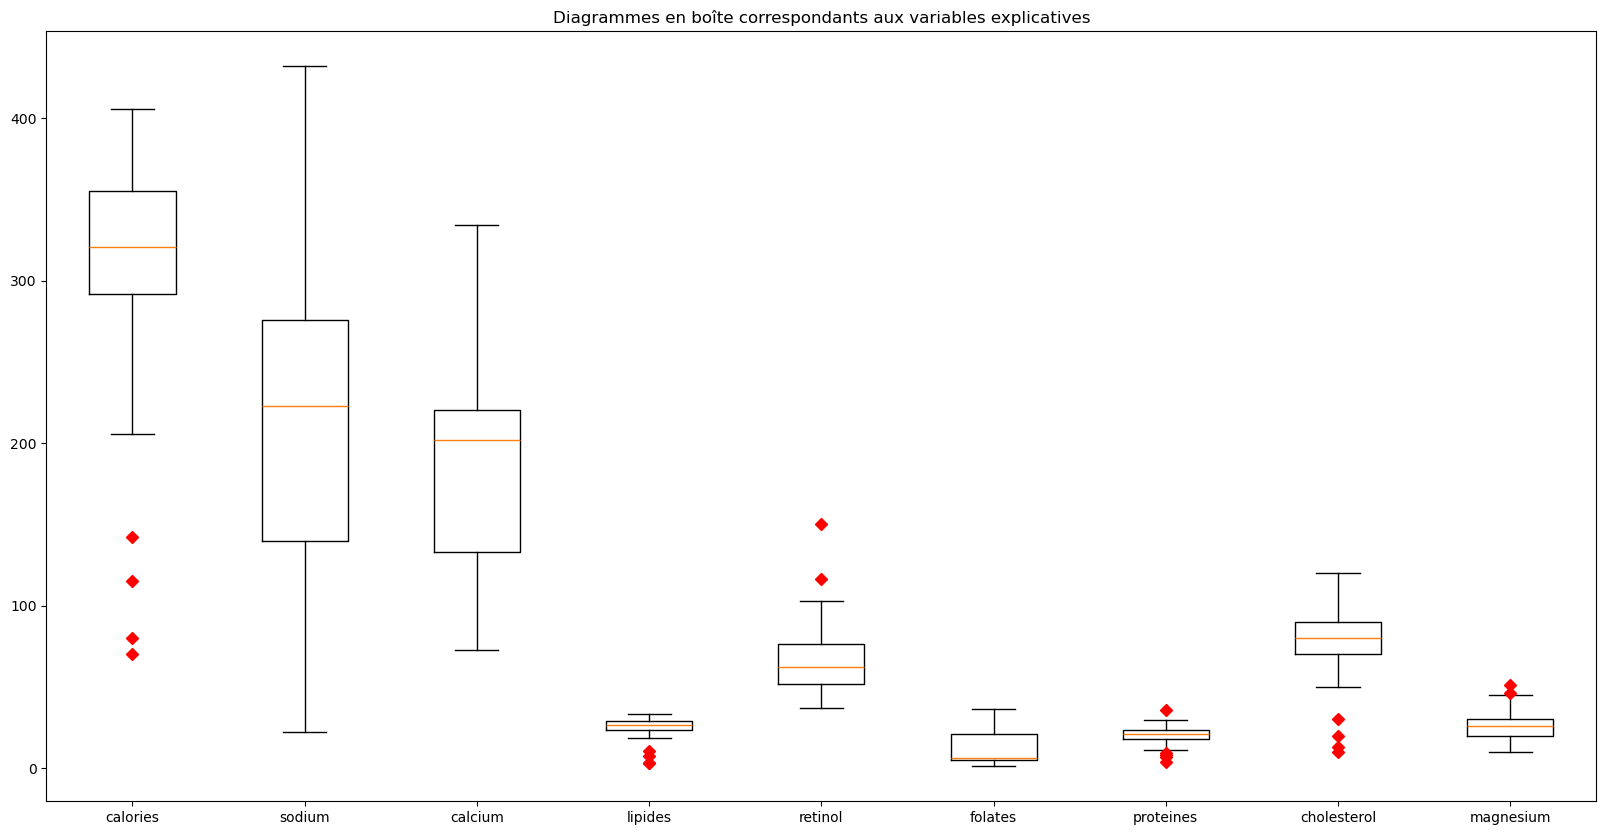

In [2]:
# Récupération des indices des colonnes 
ls_features = list(df.keys())

# Diagramme en boîte (boxplot) de toutes les variables explicatives
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(df.values, 0, 'rD', labels = ls_features)
# ou df.boxplot(column=list(df.columns))

plt.show()

Le diagramme ci-dessus illustre que la variance observée dépend beaucoup de la caractériqtique observée. On observe des valeurs extrêmes dans certains cas, notamment pour les calories et le cholestérol. 

# Apprentissage des données

La classification ascendante hiérarchique (CAH) est une méthode de partitionnement des données d’apprentissage non supervisé. 


A partir d’un ensemble de données représentées par n points, son but est de répartir ces points dans un certain nombre de classes (clusters) non défini au préalable. 


La classification ascendante hiérarchique est dite ascendante (en anglais bottom up) car elle part d’une situation où tous les individus forment chacun une classe, puis sont rassemblés en classes de plus en plus grandes. 


L’algorithme suit la démarche récursive suivante :
-	S’il y a plus d’un cluster, calculer la distance entre tous les points du data set
-	Mettre chaque objet dans son propre cluster
-	Fusionner les deux clusters les plus proches
-	Calculer les distances entre le nouveau cluster et les autres
-	Répéter les deux dernières opérations jusqu’à obtenir un seul cluster.


Comment est mesurée la distance ou l’éloignement entre deux clusters ? 


Les principales métriques utilisées pour calculer la distance entre deux clusters sont :
-	La distance minimal (single linkage) : il s’agit de la plus petite distance mesurée entre deux points de clusters différents.
-	La distance maximal (complete linkage) : il s’agit de la plus grande distance mesurée entre deux points de clusters différents. 
-	La distance moyenne (average linkage) : Il s’agit de la moyenne des distances entre chaque point du premier cluster et chaque point du second. 


Le qualificatif hiérarchique de cette classification vient du fait qu’elle produit une hiérarchie entre les clusters à toutes les étapes de l’algorithme : au sommet de la hiérarchie, tous les point sont regroupés et en bas de la hiérarchie, tous les points sont isolés. 


Cette hiérarchisation s’observe parfaitement à l’aide de dendrogrammes. Un dendrogramme, ou arbre hiérarchique, est un diagramme qui montre les différents clusters obtenus à chaque étape. 


La première ligne représente les données et les nœud représentent les regroupements auquel les données appartiennent. 


In [3]:
# Initialisation du classifieur CAH pour 4 clusters
cluster = AgglomerativeClustering(n_clusters= 4)

# Apprentissage des données
cluster.fit(df[ls_features])

# Calcul des labels du dataset
labels = cluster.labels_

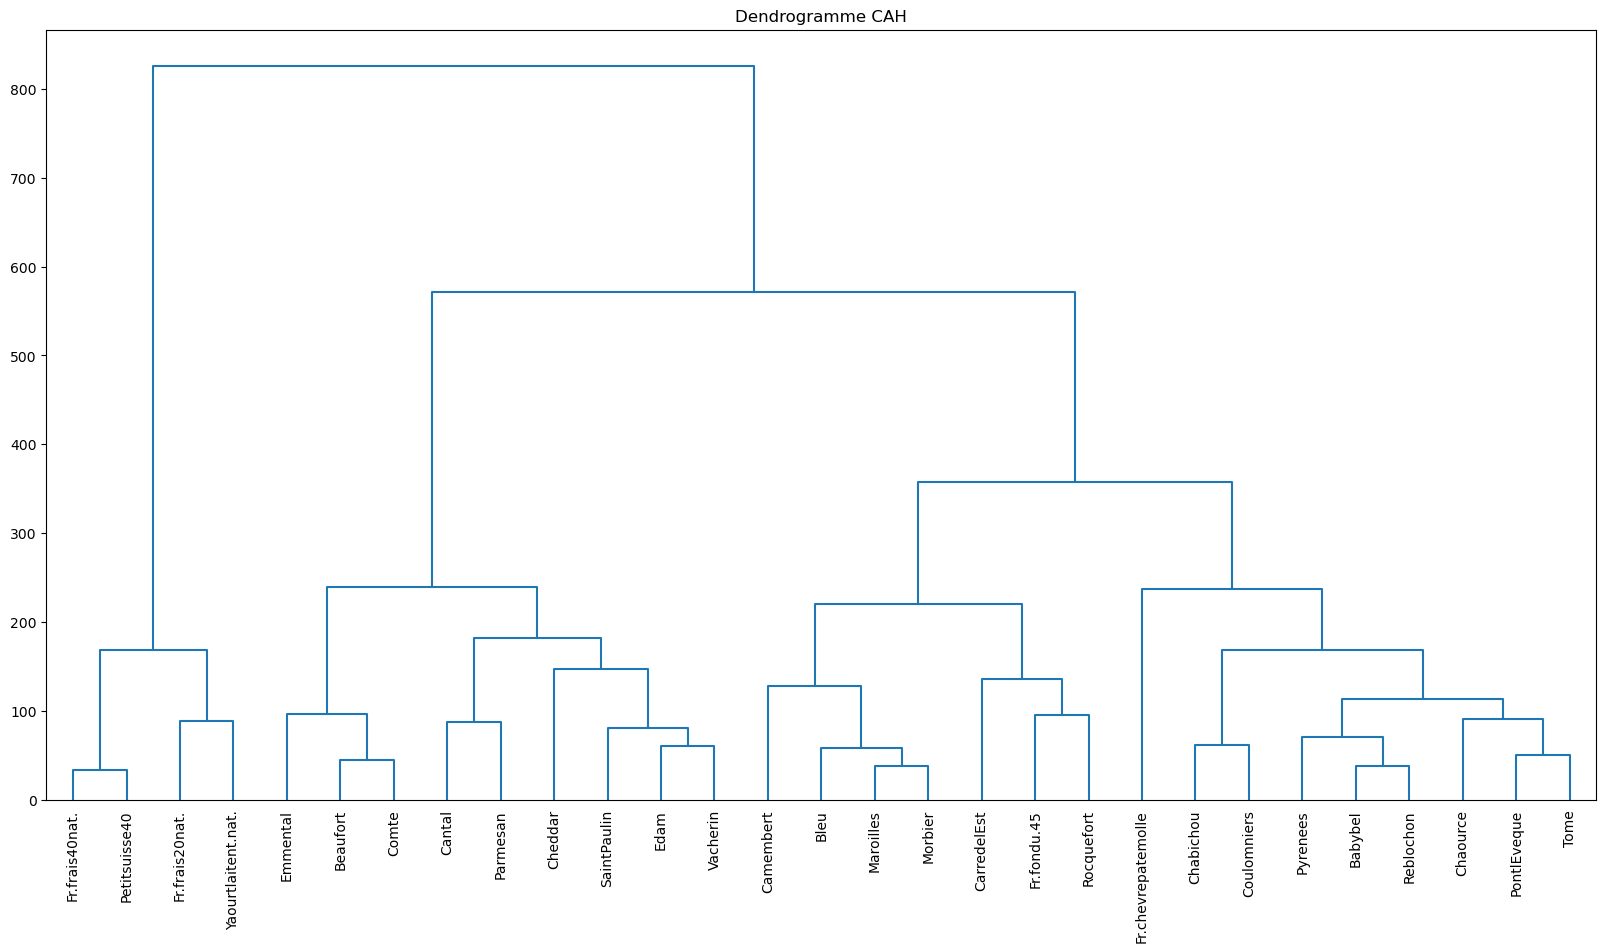

In [4]:
# Importation des packages nécessaires pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialisaion de la figrue
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(df, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

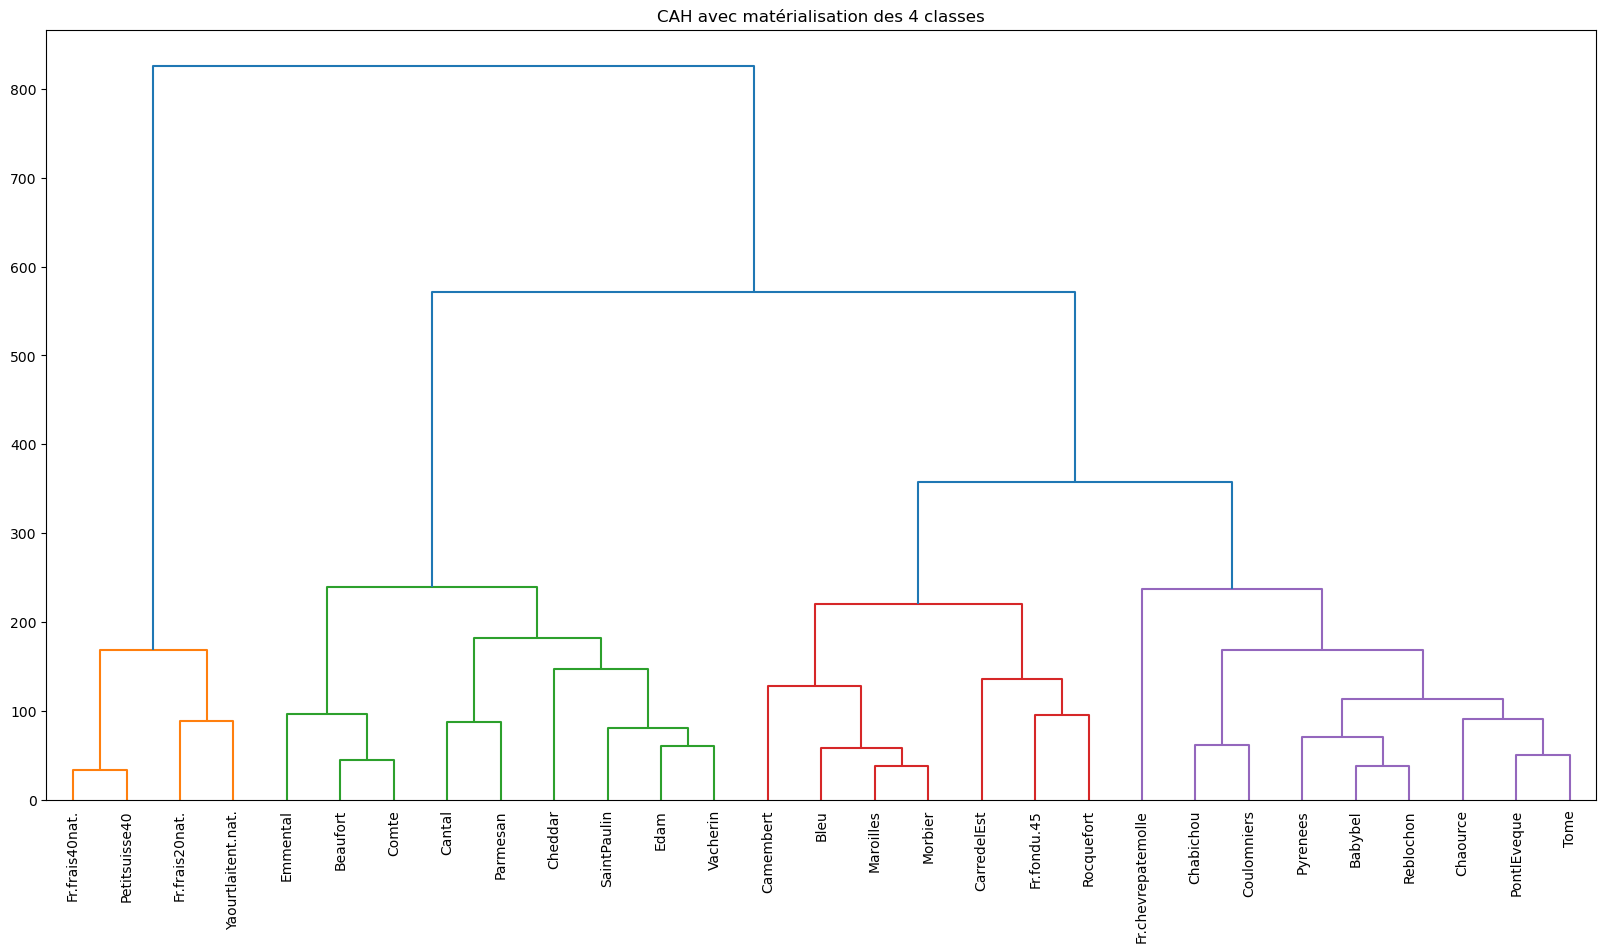

In [5]:
# Initialisation de la figure
plt.figure(figsize=(20, 10))

# Matérialisation des 4 classes (hauteur t = 290)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 290)
plt.show()

Evaluation du clustering
En apprentissage non supervisé, l’évaluation d’une méthode est une problématique délicate : la pertinence des groupes formés reste très dépendante du problème traité. 


En pratique, il existe des méthodes pour mesurer la qualité des résultats : une première approche consiste à utiliser des données artificielles pour lesquelles le regroupement attendu est connu. 


Ainsi, l’approche d’évaluation se base sur des critères numériques et consiste à mesurer l’inertie intra-cluster et/ou la séparation inter-clusters.   


In [6]:
# Importation de la fonction silhouette_score du package sklearn.metrics
from sklearn.metrics import silhouette_score

# Calcul du coefficient de silhouette
silhouette_score(df, labels, metric='sqeuclidean')

0.4841389058187828

Pour pouvoir choisir le nombre de cluster optimal, il est possible d’entraîner l’algorithme CAH pour différentes valeurs n_clusters et calculer le coefficient de silhouette pour chaque modèle entraîné. 

In [7]:
# Définition de la liste de n_clusers
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Initialisation de la liste des coefficients de la silhouette score
s_scores = []

# Calcul du coefficient de silhouette pour les différentes valeurs de n_clusters
for n_clusters in range_n_clusters :
    
    # Initialisation du classificateur CAH pour n_clusters
    cluster = AgglomerativeClustering(n_clusters = n_clusters)

    # Apprentissage des données 
    cluster.fit(df[ls_features])

    # Calcul des labels du data set
    labels = cluster.labels_
    
    # Caclul du coefficient de silhouette
    s_score = silhouette_score(df, labels, metric='sqeuclidean')
    s_scores.append(s_score)

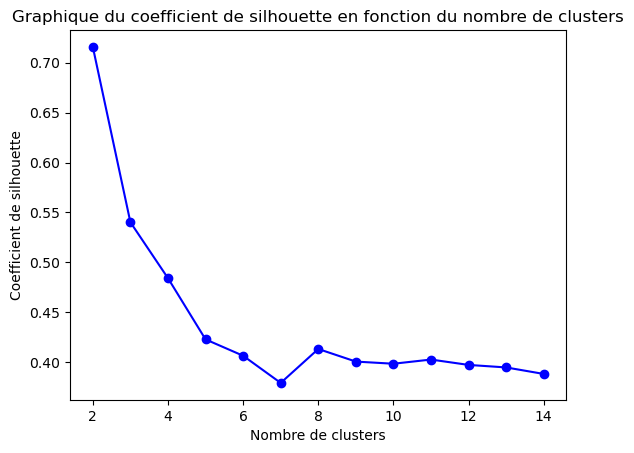

In [8]:
# Graphique du coefficient de silhouette en fonction du nombre de clusters
plt.plot(range_n_clusters, s_scores, 'bo-')
plt.title('Graphique du coefficient de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()

L’analyse du coefficient de silhouette permet de mesurer le résultat du clustering sur deux critères :
-	L’homogénéité intra-cluster
-	La séparation inter-cluster


Le nombre de clusters qui satisfait le plus ces critères est 2, vue que le coefficient de silhouette de partitionnement pour n_clusters = 2 est le plus élevé. 


Un autre critère important est le coefficient Calinski-Harabasz . 


En résumé, il est possible de dire si un regroupement donné a du sens, mais il est beaucoup plus problématique de quantifier son intérêt ou de dire si un regroupement est meilleur qu'un autre.


Il est alors nécessaire d'avoir une bonne connaissance du jeu de données traité pour savoir quel sera le meilleur regroupement.